(10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95)
(-7.194415226997684, -6.664355871886567, -7.151026359093448, -6.668577337474444, -7.209196677396292, -7.155633087196443, -7.805493700411231, -7.88429907253436, -8.294577021208204, -9.064488835664733, -9.628656184380047, -9.861904217129224, -9.825296425532192, -9.678708710325857, -10.333184489902166, -10.332795930469818, -10.382461839110666, -10.709627636723841)


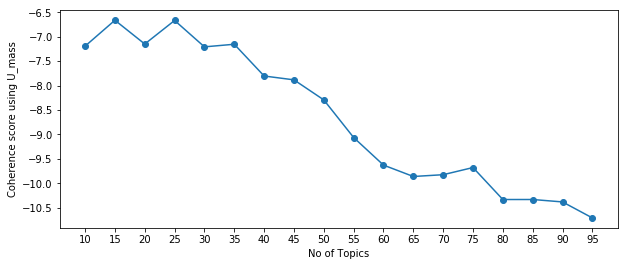

In [6]:
import pickle
with open('k_lang.pkl', 'r') as f:
        k = pickle.load(f)
with open('v_lang.pkl', 'rb') as f:
        v = pickle.load(f)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
k, v = zip(*sorted(zip(k, v)))
print(k)
print(v)
plt.plot(k, v,'-o')
plt.xlabel("No of Topics")
plt.ylabel("Coherence score using U_mass")
_=plt.gca().set_xticks(k)

In [1]:
from gensim.models import AuthorTopicModel
from gensim import matutils
import numpy as np
import networkx as nx

model = AuthorTopicModel.load('model_80.atmodel')

for topic in range(model.num_topics):
    print (model.print_topic(topic))

C:\Users\Lucifer\Anaconda2\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


0.108*"sell_cvv" + 0.030*"fullz" + 0.022*"cvv_good" + 0.022*"fresh_sell" + 0.018*"illuminati" + 0.017*"swarm" + 0.015*"vbv" + 0.014*"bin_sell" + 0.013*"tmor" + 0.013*"ini"
0.258*"spam" + 0.018*"suck" + 0.015*"positive" + 0.014*"founder" + 0.014*"own" + 0.013*"publish" + 0.012*"wall" + 0.012*"affect" + 0.011*"signal" + 0.011*"jone"
0.021*"review" + 0.017*"crypto_currency" + 0.015*"period" + 0.014*"random" + 0.013*"gas" + 0.012*"ton" + 0.011*"percent" + 0.011*"f" + 0.011*"social_medium" + 0.010*"tv"
0.072*"effort" + 0.057*"degree" + 0.037*"refuse" + 0.036*"underage" + 0.031*"underage_girl" + 0.031*"post_penis" + 0.027*"wtf" + 0.016*"mirror" + 0.014*"pursue" + 0.014*"assessment"
0.051*"girl" + 0.046*"sex" + 0.044*"wife" + 0.039*"body" + 0.031*"dick" + 0.028*"night" + 0.026*"cock" + 0.024*"parent" + 0.021*"inside" + 0.019*"baby"
0.211*"score_exact" + 0.109*"bonehurtingjuice" + 0.108*"dupebro" + 0.097*"bonehurtingjuice_similar" + 0.093*"confidence_score" + 0.046*"dupebro_reverse" + 0.046*"r

0.083*"vaccine" + 0.068*"forest_bank" + 0.058*"foresting_network" + 0.025*"coze" + 0.021*"angenium" + 0.015*"airline" + 0.015*"platform_deviate" + 0.014*"rubykube" + 0.013*"cdc" + 0.012*"ota"
0.055*"cinemassacre" + 0.054*"matei" + 0.027*"bootsy" + 0.026*"bandito" + 0.026*"racist_comic" + 0.026*"know_matei" + 0.026*"official_cinemassacre" + 0.026*"ask_bootsy" + 0.026*"defame_irate" + 0.022*"cinemassacre_youtube"
0.022*"representative" + 0.020*"court" + 0.019*"city" + 0.019*"federal" + 0.019*"letter" + 0.018*"election" + 0.016*"russian" + 0.016*"office" + 0.016*"attorney" + 0.015*"united"
0.027*"unemployment" + 0.014*"finibus" + 0.014*"police_department" + 0.014*"tehran" + 0.013*"hijab" + 0.013*"civil_right" + 0.011*"mek" + 0.010*"tripping" + 0.010*"worsen" + 0.009*"contaminate"
0.063*"nbsp" + 0.043*"node" + 0.037*"n" + 0.029*"t" + 0.028*"core" + 0.025*"privacy" + 0.025*"web" + 0.024*"d" + 0.021*"e" + 0.020*"b"
0.076*"submission_r" + 0.046*"special" + 0.027*"series" + 0.024*"context" + 0

In [2]:
def similarity(vec1, vec2, num_topics):
    '''Get similarity between two vectors using hellinger distance--fit for comparing probabilities'''
    dist = matutils.hellinger(matutils.sparse2full(vec1, num_topics), \
                              matutils.sparse2full(vec2, num_topics))
    sim = 1.0 / (1.0 + dist)
    return sim

# the_model.id2author.values()
sims = np.zeros((model.num_authors, model.num_authors), )
for i, i_name in model.id2author.items():
    for j, j_name in model.id2author.items():    
        if j> i:
            sims[i, j]=sims[j, i]=similarity(model[i_name], model[j_name], model.num_topics)
sims+=np.eye(model.num_authors)
G = nx.from_numpy_matrix(sims,)
nx.set_node_attributes(G, name='subreddit', values=model.id2author)

In [3]:
nx.get_node_attributes(G, name='subreddit')

{0: 'AVGN',
 1: 'AllModsAreBastards',
 2: 'AltcoinBeginners',
 3: 'AnswersFromHistorians',
 4: 'ArkEcosystem',
 5: 'AsianFeet',
 6: 'AskGamerGate',
 7: 'Automate',
 8: 'BadRedditNoDonut',
 9: 'Bellingham',
 10: 'BestOfNoPolitics',
 11: 'BioshockInfinite',
 12: 'BitcoinCashLol',
 13: 'BitcoinDiscussion',
 14: 'BitcoinSerious',
 15: 'Bitcoin_Exposed',
 16: 'Bitcoincash',
 17: 'Blackout2015',
 18: 'BytecoinBCN',
 19: 'CAMSP',
 20: 'CardanoCoin',
 21: 'CardanoMarkets',
 22: 'Coinex',
 23: 'ConspiracyII',
 24: 'Corridor',
 25: 'CryptoCurrency',
 26: 'CryptoCurrencyMeta',
 27: 'CryptoMarkets',
 28: 'CryptoTechnology',
 29: 'CryptoWikis',
 30: 'Cuckold',
 31: 'CuckoldCommunity',
 32: 'CuckoldPregnancy',
 33: 'DNCleaks',
 34: 'Dcrtrader',
 35: 'Diepio_',
 36: 'Dirtybomb',
 37: 'EVEX',
 38: 'ElderScrolls',
 39: 'Ellenpaoinaction',
 40: 'ElonMuskTweets',
 41: 'EthTrader_Test',
 42: 'EthereumClassic',
 43: 'EverythingFoxes',
 44: 'FMTClinics',
 45: 'FoxesInSnow',
 46: 'GGinSF',
 47: 'Gangstalking

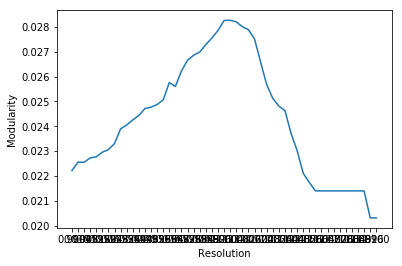

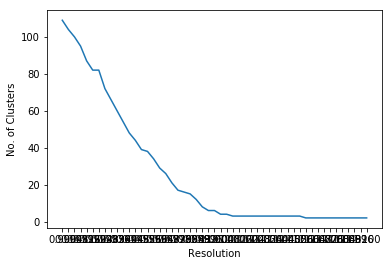

In [63]:
from community import community_louvain
import numpy as np
# partition = community.best_partition(G, resolution=.95) #<--- this is the param you want to tweak

resolution = np.arange(0.9,1.1,0.004)

size_of_clusters=[]
modularity_list = []
for i in resolution:
    #print(i)
    partition = community_louvain.best_partition(G, resolution=i)
    mod=community_louvain.modularity(partition,G)
    modularity_list.append(mod)
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G)
    count = 0.
    list_partitions = []
    list_partitions_names = []
    for com in set(partition.values()):
        count = count + 1.

        list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
        list_partitions.append(list_nodes)
        list_partitions_name = list(map(lambda x:model.id2author[x], list_nodes))
        #print(list_partitions_name)
        list_partitions_names.append(list_partitions_name)
        
    #print("Number of Clusters:",len(list_partitions_names))
    size_of_clusters.append(len(list_partitions_names))

plt.figure(1)
plt.plot(resolution,modularity_list)
plt.xlabel("Resolution")
plt.ylabel("Modularity")
_=plt.gca().set_xticks(resolution)

plt.figure(2)
plt.plot(resolution,size_of_clusters)
plt.xlabel("Resolution")
plt.ylabel("No. of Clusters")
_=plt.gca().set_xticks(resolution)

#print(resolution)
#print(size_of_clusters)


In [64]:
modularity_list.index(max(modularity_list))

26

In [65]:
max(modularity_list)

0.02826846086381992

In [66]:
resolution

array([0.9  , 0.904, 0.908, 0.912, 0.916, 0.92 , 0.924, 0.928, 0.932,
       0.936, 0.94 , 0.944, 0.948, 0.952, 0.956, 0.96 , 0.964, 0.968,
       0.972, 0.976, 0.98 , 0.984, 0.988, 0.992, 0.996, 1.   , 1.004,
       1.008, 1.012, 1.016, 1.02 , 1.024, 1.028, 1.032, 1.036, 1.04 ,
       1.044, 1.048, 1.052, 1.056, 1.06 , 1.064, 1.068, 1.072, 1.076,
       1.08 , 1.084, 1.088, 1.092, 1.096, 1.1  ])

In [69]:
from community import community_louvain
# partition = community.best_partition(G, resolution=.95) #<--- this is the param you want to tweak
partition = community_louvain.best_partition(G)

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
list_partitions = []
list_partitions_names = []
for com in set(partition.values()):
    count = count + 1.

    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    list_partitions.append(list_nodes)
    list_partitions_name = list(map(lambda x:model.id2author[x], list_nodes))
    print(list_partitions_name)
    list_partitions_names.append(list_partitions_name)
    
print("Number of Clusters:",len(list_partitions_names))

['AVGN', 'ArkEcosystem', 'Automate', 'BadRedditNoDonut', 'Bellingham', 'BitcoinDiscussion', 'BitcoinSerious', 'Bitcoincash', 'BytecoinBCN', 'ConspiracyII', 'Corridor', 'CryptoCurrency', 'CryptoCurrencyMeta', 'CryptoMarkets', 'CryptoTechnology', 'CryptoWikis', 'Cuckold', 'CuckoldPregnancy', 'Dirtybomb', 'EVEX', 'ElderScrolls', 'Ellenpaoinaction', 'EthereumClassic', 'FoxesInSnow', 'Gangstalking', 'Hotwife', 'HumanMicrobiome', 'HyperSpace', 'IndiaNonPolitical', 'IndiaSpeaks', 'Indian_Academia', 'KotakuInAction', 'Lightbulb', 'Lisk', 'LitecoinTraders', 'MakingaMurderer', 'MassEffectAndromeda', 'Morrowind', 'MurderedByWords', 'NSFW_Snapchat', 'Oppression', 'PRPS2', 'PhantomForces', 'Playdate', 'RBI', 'ReportTheBadModerator', 'Ripple', 'SRC_Meta', 'SRSsucks', 'SocialistRA', 'SpaceStationThirteen', 'SubredditSentinals', 'SugarBaby', 'The_Cabal', 'TotalWarArena', 'TrueSPH', 'Vinesauce', 'WarFrameCirclejerk', 'WeAreTheMusicalMakers', 'WhereIsAssange', 'XRP', 'btc', 'btcfork', 'cardano', 'cfs', 

In [75]:
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
smallest_author = 0  # Ignore authors with documents less than this.
authors = [model.author2id[a] for a in model.author2id.keys() if len(model.author2doc[a]) >= smallest_author]
_ = tsne.fit_transform(model.state.gamma[authors, :])  # Result stored in tsne.embedding_
embedding = tsne.embedding_
print(type(embedding[0]))
#print(embedding.size)
#print(authors)
#print(embedding)

#cluster1_names=['AVGN', 'Cuckold', 'CuckoldPregnancy'

id1=model.author2id['Cuckold']
print(id)
o=authors.index(id1)
print(embedding[o])
id1=model.author2id['reverseanimalrescue']
print(id)
o=authors.index(id1)
print(embedding[o])

<type 'numpy.ndarray'>
<built-in function id>
[11.790575 -1.83719 ]
<built-in function id>
[-7.808501  -4.7507143]


In [76]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.models import HoverTool, LabelSet
from bokeh.plotting import figure, show, ColumnDataSource
import numpy as np
import bokeh
# from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
print(type(tsne.embedding_))
x = tsne.embedding_[:, 0]
print(type(x))
y = tsne.embedding_[:, 1]
author_names = [model.id2author[a] for a in authors]

# Radius of each point corresponds to the number of documents attributed to that author.
scale = 0.1
author_sizes = [len(model.author2doc[a]) for a in author_names]
radii = [np.log(size) * scale for size in author_sizes]

source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            author_names=author_names,
            author_sizes=author_sizes,
            radii=radii,
        )
    )

# Add author names and sizes to mouse-over info.
hover = HoverTool(
        tooltips=[
        ("author", "@author_names"),
        ("size", "@author_sizes"),
        ]
    )

p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'], plot_width=1000, plot_height=1000)
p.scatter('x', 'y', radius='radii', source=source, fill_alpha=0.6, line_color=None)
labels = LabelSet(x='x', y='y', text='author_names', level='glyph',
              x_offset=0, y_offset=0, source=source, render_mode='canvas', text_font_size="8pt")
p.add_layout(labels)

show(p)


Loading BokehJS ...

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [77]:
import numpy
authors, author_names, tsne.embedding_ = zip(*sorted(zip(authors, author_names, tsne.embedding_)))
tsne.embedding_=numpy.asarray(tsne.embedding_)

cluster_ids = []
x_ = []
y_ = []
author_sizes = []
radii_ = []
for cluster_names in list_partitions_names:
    cluster_ids.append([model.author2id[a] for a in cluster_names])
    x_.append(tsne.embedding_[cluster_ids[-1], 0])
    y_.append(tsne.embedding_[cluster_ids[-1], 1])
    author_sizes.append([len(model.author2doc[a]) for a in cluster_names])
    radii_.append([np.log(size) * scale for size in author_sizes[-1]])

In [96]:
sources = []
for i in range(len(list_partitions_names)):
    source = ColumnDataSource(
        data=dict(
            x=x_[i],
            y=y_[i],
            author_names=list_partitions_names[i],
            cluster_id = np.repeat(i, len(x_[i])),
            author_sizes=author_sizes[i],
            radii=radii_[i],
        )
    )
    sources.append(source)

# Add author names and sizes to mouse-over info.
hover = HoverTool(
        tooltips=[
        ("author", "@author_names"),
        ("size", "@author_sizes"),
        ("cluster", "@cluster_id"),
        ]
    )

N = len(list_partitions_names)
x_c = np.random.random(size=N) * 100
y_c = np.random.random(size=N) * 100

colors = [
    "#%02x%02x%02x" % (int(r), int(g), 100) for r, g in zip(50+2*x_c, 30+2*y_c)
]


p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'], plot_width=1000, plot_height=1000)

for i in range(len(list_partitions_names)):
    print(colors[i])
    p.scatter('x', 'y', radius='radii', source=sources[i], fill_alpha=0.6, line_color=None,color=colors[i])

'''
#labels = LabelSet(x='x1', y='y1', text='cluster1_names', level='glyph',
#                  x_offset=0, y_offset=0, source=source1, render_mode='canvas', text_font_size="8pt")
#p.add_layout(labels)
'''
show(p)



#9b2c64
#f9da64
#ac4064
#44b964
#cbcf64
#dcaf64


In [102]:
import praw
reddit = praw.Reddit(client_id='mqR9aXhmWsRnBA',
                    client_secret="jGqYEnVqqfw32nf0Mbra97oe5_Q", password='omsrisai1',
                    username='prernaj79', user_agent='Python check mod v2.0 (by /u/prernaj79 )')

print(reddit.get('/r/conspiracy/about.json').subscribers)

736616


In [110]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)
pca.fit(model.state.gamma[authors, :])
print(pca.explained_variance_ratio_)
#first component explains 96% of the variance. This stuff is unidimensional

[9.62266007e-01 1.98956477e-02 6.59137705e-03 2.63390545e-03
 2.42979812e-03 1.86921366e-03 1.56433725e-03 7.58796339e-04
 3.64011308e-04 3.12475312e-04 2.65282421e-04 1.64836353e-04
 1.27597647e-04 1.13619147e-04 9.72778952e-05 7.76803977e-05
 7.30319725e-05 5.44546036e-05 4.88725140e-05 4.09692638e-05
 3.41409864e-05 3.29124236e-05 2.89555359e-05 2.54379538e-05
 2.23906430e-05 1.85569558e-05 1.29427166e-05 1.10428063e-05
 9.83999444e-06 7.94591009e-06 6.77049572e-06 6.55396679e-06
 5.22097732e-06 4.61115872e-06 3.74649767e-06 3.35279295e-06
 2.68186948e-06 2.30243865e-06 2.01305204e-06 1.87959842e-06
 1.29357739e-06 1.18615884e-06 8.42124655e-07 7.43064085e-07
 6.17652795e-07 4.60830376e-07 4.21297664e-07 3.43455293e-07
 2.25255473e-07 1.86419005e-07 1.44981691e-07 1.35592679e-07
 1.24311679e-07 1.18658804e-07 9.92825269e-08 8.15770682e-08
 6.62638868e-08 6.10762699e-08 5.18882330e-08 4.56236324e-08
 4.02233921e-08 3.50344054e-08 2.70081195e-08 2.56376050e-08
 2.26121020e-08 2.186877

In [111]:
pca=PCA(n_components=1, random_state=0)
unidimensional = pca.fit_transform(model.state.gamma[authors, :])
author_sizes = [len(model.author2doc[a]) for a in author_names]
#the first component is highly correlated with the size of the modlog
#2 hypotheses:
#1) similar subreddits started using the tool at the same time, the oldest ones having similar topics
#2) high-volume subreddits have similar problems (i.e. comments that get reported)
np.corrcoef(unidimensional.ravel(), author_sizes)

array([[1.        , 0.98290985],
       [0.98290985, 1.        ]])

In [112]:
import pandas as pd
pd.set_option("display.max_colwidth", 10000)
df = pd.read_csv("to_process_removal.csv")

In [262]:
model['AVGN']

[(2, 0.01299533723729304),
 (4, 0.05265045272070584),
 (7, 0.029906773283920576),
 (16, 0.013768445518628757),
 (18, 0.03358067912762191),
 (20, 0.04435685226575801),
 (23, 0.03222200234597016),
 (24, 0.014737992577007116),
 (26, 0.02482703360424456),
 (28, 0.025268268726329195),
 (30, 0.045634802471820494),
 (34, 0.07285130497243425),
 (36, 0.020970329133806965),
 (41, 0.10542336718265025),
 (46, 0.08042423004405477),
 (52, 0.011875328073985674),
 (55, 0.01811716265666437),
 (58, 0.04254234165476565),
 (60, 0.035011419934384086),
 (64, 0.015899847791226582),
 (66, 0.023780256449943263),
 (73, 0.014505719724043305)]

In [263]:
model.state.gamma[2]

array([0.69570493, 0.64795173, 2.74426821, 0.69979576, 0.70731895,
       0.83754461, 0.77005288, 0.79587066, 2.52393871, 0.61723449,
       0.81366683, 0.60610828, 0.8961057 , 0.84987932, 0.58604781,
       1.87508143, 0.81851001, 0.68373395, 0.65722332, 0.79305458,
       1.18253779, 0.67866108, 0.71009106, 1.6999097 , 1.17896152,
       0.69081866, 0.94971754, 0.72984675, 0.84472079, 0.70628075,
       0.69352649, 1.01906612, 0.68322683, 0.77571032, 0.7847514 ,
       0.71665723, 1.32298747, 0.91210278, 0.65847337, 1.34511256,
       0.65374816, 0.73093158, 0.77377631, 1.00387773, 0.75956737,
       0.68742597, 0.80785739, 1.12338238, 0.70531019, 0.8965048 ,
       0.68164034, 0.8424121 , 1.4596947 , 0.8027861 , 0.76637561,
       0.96459172, 0.66029176, 0.66730182, 1.25085063, 0.68618935,
       1.21006172, 0.67693983, 0.97451292, 1.02034168, 1.74219642,
       0.70166348, 1.26581958, 2.16450284, 0.78221987, 0.86314261,
       0.75155134, 0.71338298, 0.66362918, 0.58974797, 0.72315

In [4]:
model.print_topic(topic, topn=10000)

u'0.112*"speech" + 0.029*"rick_falkvinge" + 0.016*"translation" + 0.016*"tezzie" + 0.015*"kk" + 0.012*"delegation_service" + 0.012*"tezos_foundation" + 0.012*"algo" + 0.011*"thar" + 0.010*"xxx" + 0.010*"faulty" + 0.009*"tzscan" + 0.009*"tez" + 0.009*"make_murderer" + 0.008*"curb" + 0.008*"tankie" + 0.008*"earl" + 0.007*"golden" + 0.007*"bakechain" + 0.007*"apologist" + 0.007*"betanet" + 0.007*"absurdity" + 0.007*"maniac" + 0.007*"ttm" + 0.007*"coerce" + 0.006*"breitman" + 0.006*"conservatism" + 0.006*"fundamentalist" + 0.006*"tz" + 0.006*"dispel" + 0.006*"warmonger" + 0.005*"checking" + 0.005*"avoid" + 0.005*"preservation" + 0.005*"old_girl" + 0.005*"uss" + 0.005*"endorser" + 0.004*"misogyny" + 0.004*"maltese" + 0.004*"goldcoin" + 0.004*"poeple" + 0.004*"katie" + 0.004*"conspiratorial" + 0.003*"suitcase" + 0.003*"tezzigator" + 0.003*"overprice" + 0.003*"criminal_charge" + 0.003*"dismissal" + 0.003*"ethcrash" + 0.003*"golden_rule" + 0.003*"viabtc" + 0.003*"propaganda_machine" + 0.003*"c

In [20]:
model.show_topic(0, topn=10000000000000000000000000000000000000)

[(u'tart', 6.053499158703739e-07),
 (u'pivex', 6.053499158703739e-07),
 (u'maccafee', 6.053499158703739e-07),
 (u'investible', 6.053499158703739e-07),
 (u'withdrawn', 6.053499158703739e-07),
 (u'copytrack', 6.053499158703739e-07),
 (u'benefactor', 6.053499158703739e-07),
 (u'februar', 6.053499158703739e-07),
 (u'nonfunctional', 6.053499158703739e-07),
 (u'tribulation', 6.053499158703739e-07)]

In [104]:
author_names

('AVGN',
 'AllModsAreBastards',
 'AltcoinBeginners',
 'AnswersFromHistorians',
 'ArkEcosystem',
 'AsianFeet',
 'AskGamerGate',
 'Automate',
 'BadRedditNoDonut',
 'Bellingham',
 'BestOfNoPolitics',
 'BioshockInfinite',
 'BitcoinCashLol',
 'BitcoinDiscussion',
 'BitcoinSerious',
 'Bitcoin_Exposed',
 'Bitcoincash',
 'Blackout2015',
 'BytecoinBCN',
 'CAMSP',
 'CardanoCoin',
 'CardanoMarkets',
 'Coinex',
 'ConspiracyII',
 'Corridor',
 'CryptoCurrency',
 'CryptoCurrencyMeta',
 'CryptoMarkets',
 'CryptoTechnology',
 'CryptoWikis',
 'Cuckold',
 'CuckoldCommunity',
 'CuckoldPregnancy',
 'DNCleaks',
 'Dcrtrader',
 'Diepio_',
 'Dirtybomb',
 'EVEX',
 'ElderScrolls',
 'Ellenpaoinaction',
 'ElonMuskTweets',
 'EthTrader_Test',
 'EthereumClassic',
 'EverythingFoxes',
 'FMTClinics',
 'FoxesInSnow',
 'GGinSF',
 'Gangstalking',
 'GitInaction',
 'HentaiCleavage',
 'HoMM',
 'Hotwife',
 'HumanMicrobiome',
 'HyperSpace',
 'IndiaNonPolitical',
 'IndiaSpeaks',
 'Indian_Academia',
 'Iowa',
 'Italian',
 'JustNew